In [1]:
#Libs to datamining and process
import pandas as pd
import numpy as np

In [2]:
#Libs to datascience and statistic
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [3]:
#Libs to Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

In [4]:
train = pd.read_csv("data/loan_train.csv", delimiter= ",", encoding= "utf-8")
test = pd.read_csv("data/loan_test.csv", delimiter= ",", encoding= "utf-8")

In [5]:
scaler = MinMaxScaler()

def transform_data (df) : 
    
    df_aux = df.copy()
    
    #Tratativas colunas binárias
    df_aux['Married'] = np.where(df_aux['Married'] == 'Yes', 1, 0)
    df_aux['Male'] = np.where(df_aux['Gender'] == 'Male', 1, 0)
    df_aux['Graduate'] = np.where(df_aux['Education'] == 'Graduate', 1, 0)
    df_aux['Self_Employed'] = np.where(df_aux['Self_Employed'] == 'Yes', 1, 0)
    df_aux['Term_360'] = np.where(df_aux['Term'] == 360, 1, 0)
    df_aux['Credit_History'] = np.where(df_aux['Credit_History'] == 1, 1, 0)
    
    df_aux['Dependents'] = np.where(df_aux['Dependents'] == '3+', 3, df_aux['Dependents'])
    df_aux['Dependents'] = pd.to_numeric(df_aux['Dependents'], errors='coerce').fillna(df_aux['Dependents'].mode().iloc[0]).astype(int)
    
    # Criar colunas dummy a partir da coluna "Area"
    dummies = pd.get_dummies(df_aux['Area'], prefix='Area')
    df_aux = pd.concat([df_aux, dummies], axis=1)
    
    #Dropar colunas versao pré tratada
    df_aux = df_aux.drop(['Gender', 'Education', 'Term', 'Area'], axis=1)

    return df_aux

In [6]:
train_trat_v1 = transform_data(train)
train_trat_v1['Status'] = np.where(train_trat_v1['Status'] == 'Y', 0, 1)

test_trat_v1 = transform_data(test)

In [7]:
train_trat_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Married             614 non-null    int32  
 1   Dependents          614 non-null    int32  
 2   Self_Employed       614 non-null    int32  
 3   Applicant_Income    614 non-null    int64  
 4   Coapplicant_Income  614 non-null    float64
 5   Loan_Amount         614 non-null    int64  
 6   Credit_History      614 non-null    int32  
 7   Status              614 non-null    int32  
 8   Male                614 non-null    int32  
 9   Graduate            614 non-null    int32  
 10  Term_360            614 non-null    int32  
 11  Area_Rural          614 non-null    uint8  
 12  Area_Semiurban      614 non-null    uint8  
 13  Area_Urban          614 non-null    uint8  
dtypes: float64(1), int32(8), int64(2), uint8(3)
memory usage: 35.5 KB


In [8]:
train_trat_v1

,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Status,Male,Graduate,Term_360,Area_Rural,Area_Semiurban,Area_Urban
0,0,0,0,584900,0.0,15000000,1,0,1,1,1,0,0,1
1,1,1,0,458300,150800.0,12800000,1,1,1,1,1,1,0,0
2,1,0,1,300000,0.0,6600000,1,0,1,1,1,0,0,1
3,1,0,0,258300,235800.0,12000000,1,0,1,0,1,0,0,1
4,0,0,0,600000,0.0,14100000,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,290000,0.0,7100000,1,0,0,1,1,1,0,0
610,1,3,0,410600,0.0,4000000,1,0,1,1,0,1,0,0
611,1,1,0,807200,24000.0,25300000,1,0,1,1,1,0,0,1
612,1,2,0,758300,0.0,18700000,1,0,1,1,1,0,0,1


# Logistic Regression Model

In [9]:
# Inicializar o modelo de regressão logística
model = LogisticRegression()

In [10]:
# Dividir os recursos e o alvo
X = train_trat_v1.drop('Status', axis=1)
y = train_trat_v1['Status']

In [12]:
# Inicializar o objeto de validação cruzada estratificada, para manter a propoção da variavel alvo entre os folds
#Em resumo, o StratifiedKFold é usado para realizar a divisão estratificada dos dados em k folds, enquanto o RepeatedStratifiedKFold estende essa funcionalidade para repetir esse processo de divisão várias vezes, fornecendo uma estimativa mais estável e confiável do desempenho do modelo.
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [13]:
# Inicializar listas vazias para armazenar as métricas de avaliação
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

***********************Fold(1)**************************************

Acurácia fold(1): 0.67
Precisão fold(1): 0.2
Recall fold(1): 0.02
F1-Score fold(1): 0.04



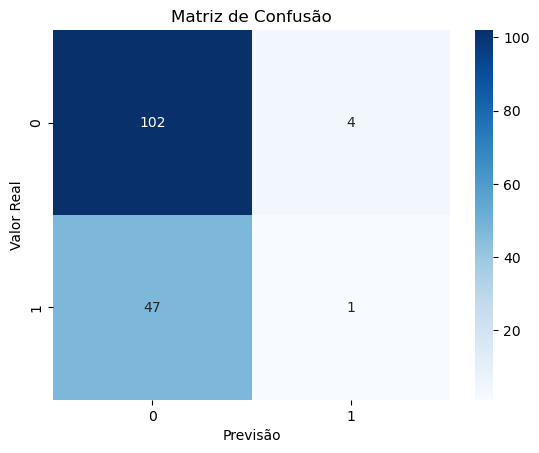

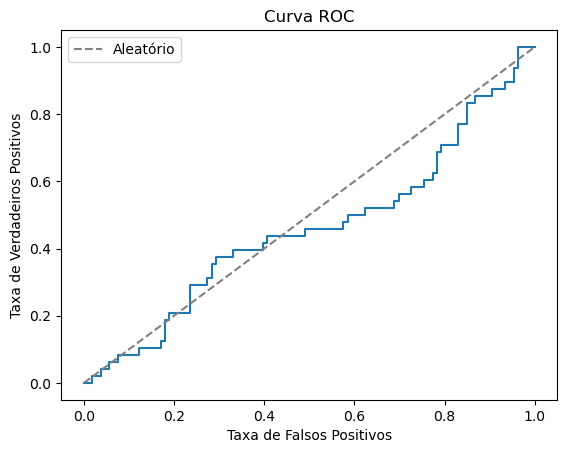

AUC-ROC: 0.45813679245283023

***********************Fold(2)**************************************

Acurácia fold(2): 0.7
Precisão fold(2): 0.67
Recall fold(2): 0.08
F1-Score fold(2): 0.15



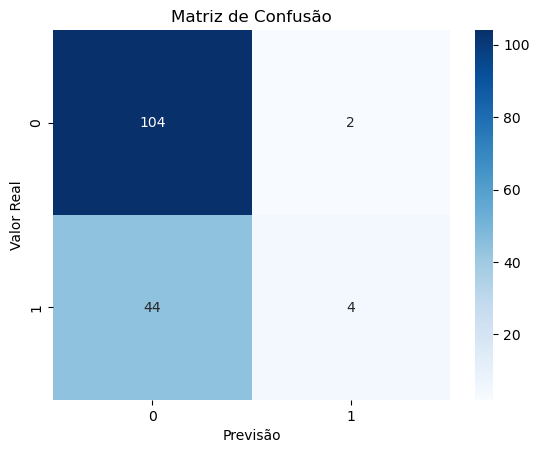

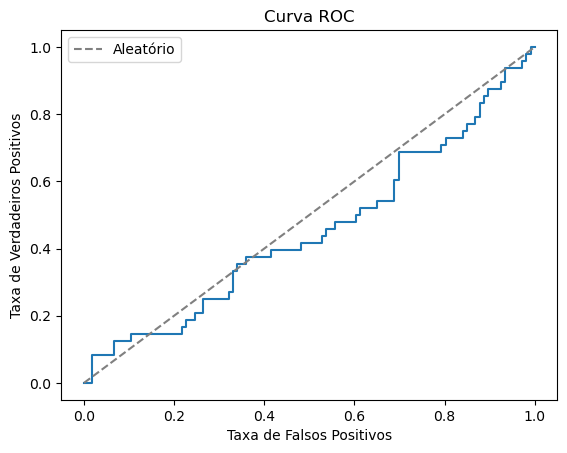

AUC-ROC: 0.4540094339622642

***********************Fold(3)**************************************

Acurácia fold(3): 0.71
Precisão fold(3): 0.67
Recall fold(3): 0.12
F1-Score fold(3): 0.21



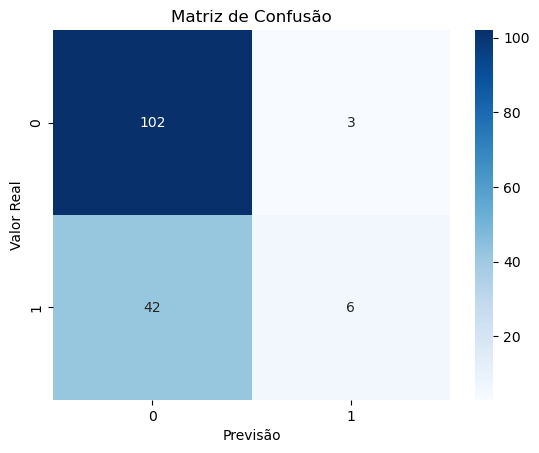

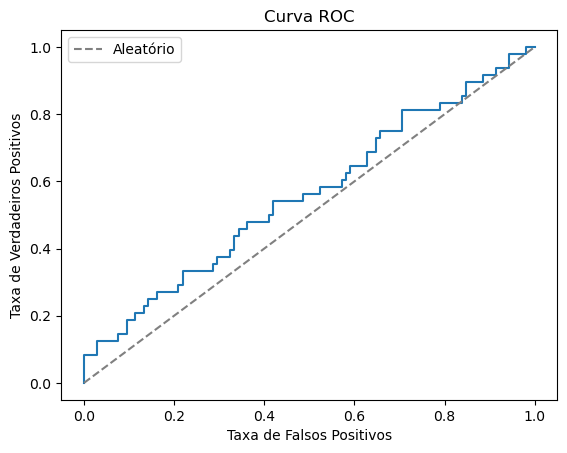

AUC-ROC: 0.5601190476190476

***********************Fold(4)**************************************

Acurácia fold(4): 0.69
Precisão fold(4): 1.0
Recall fold(4): 0.0
F1-Score fold(4): 0.0



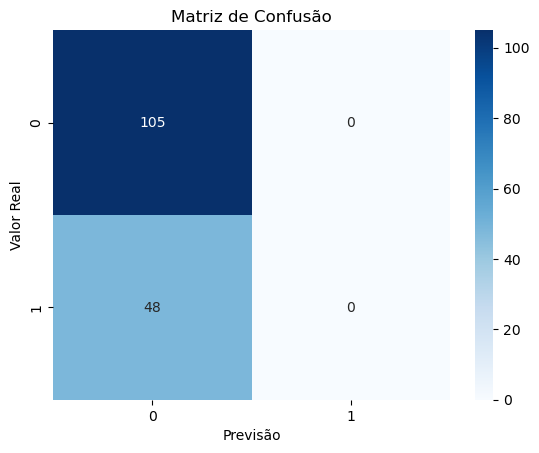

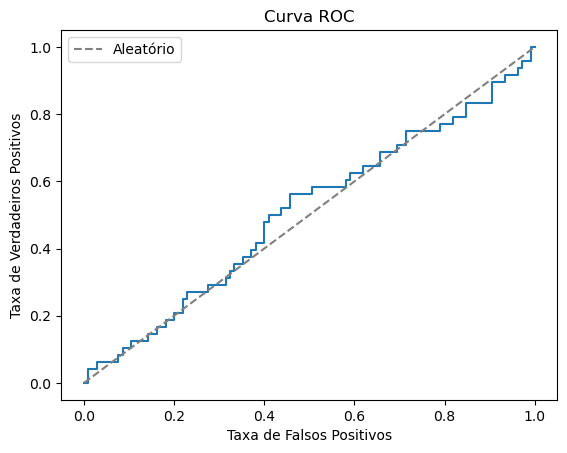

AUC-ROC: 0.5087301587301587



In [22]:
fold = 1

# Loop de validação cruzada
for train_index, test_index in stratified_kfold.split(X, y):
    
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Inicializar o modelo de regressão logística
    model = LogisticRegression()
    
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)
        
    # Calcular as métricas de avaliação e adicioná-las às listas
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=1))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=1))
    
    
    #**************************Representações por Fold************************************* :
    print(f'***********************Fold({fold})**************************************')
    print()
    print(f'Acurácia fold({fold}): {accuracy_score(y_test, y_pred).round(2)}')
    print(f'Precisão fold({fold}): {precision_score(y_test, y_pred, zero_division=1).round(2)}')
    print(f'Recall fold({fold}): {recall_score(y_test, y_pred, zero_division=1).round(2)}')
    print(f'F1-Score fold({fold}): {f1_score(y_test, y_pred, zero_division=1).round(2)}')
    print()
    
    # Calcular a matriz de confusão
    confusion_mat = confusion_matrix(y_test, y_pred)
    # Plotar a matriz de confusão
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previsão')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusão')
    plt.show()
    print()
    
    # Calcular as probabilidades das previsões
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    # Plotar a curva ROC
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Aleatório')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
    # Calcular a área sob a curva ROC (AUC-ROC)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f'AUC-ROC: {auc_roc}')
    print()
    
    fold += 1

In [18]:
# Imprimir as métricas de avaliação médias
print(f'Acurácia média: {np.mean(accuracy_scores).round(2)}')
print(f'Precisão média: {np.mean(precision_scores).round(2)}')
print(f'Recall médio: {np.mean(recall_scores).round(2)}')
print(f'F1-Score médio: {np.mean(f1_scores).round(2)}')

Acurácia média: 0.69
Precisão média: 0.63
Recall médio: 0.06
F1-Score médio: 0.1


# Conclusões v0 : Dados brutos sem tratamento
    - Modelo com performance totalmente aleatória